In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Rispondere alle domande
Trasforma le seguenti richiesti in formule per estrarre infromazioni dal dataframe
- Mostrami le vendite maggiori di 10

- Mostrami i dati del 2018

- Mostrami le vendite maggiori di 13 e l'anno è il 2018

- Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018

- Mostrami i dati dove le vendite divise per 3 sono maggiori di 3

- Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J



In [2]:
sales = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)
sales

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
7,Alaina,15,2020
8,Egweyn,5,2020


In [26]:
#vendite maggiori di 10
#print(sales[sales['sales'] > 10])
print('vendite > 10: \n', sales.query('sales > 10'))

#dati del 2018
#sales[sales['year'] == 2018]
print('\ndati del 2018: \n', sales.query('year == 2018'))

#vendite > 13 dell'anno 2018
#sales[(sales['year'] == 2018) & (sales['sales'] > 13)]
print('\nvendite >13 e anno 2018: \n', sales.query(('year == 2018 and sales > 13')))

#tutto tranne vendite > 13 dell'anno 2018
print('\nescludo vendite >13 nel 2018: \n', sales.query(('year != 2018 or sales <= 13')))

#dati in cui le vendite/3 sono >3
print('\n vendite/3 >3: \n', sales.query('sales/3 > 3'))

#nomi dopo la J
print('\nnomi dopo la J: \n', sales[sales['employee'].str[0] > 'J'])

vendite > 10: 
   employee  sales  year
0  Katrina     14  2018
1   Guanyu     17  2019
3    Roman     12  2018
7   Alaina     15  2020

dati del 2018: 
   employee  sales  year
0  Katrina     14  2018
3    Roman     12  2018

vendite >13 e anno 2018: 
   employee  sales  year
0  Katrina     14  2018

escludo vendite >13 nel 2018: 
      employee  sales  year
1      Guanyu     17  2019
2         Jan      6  2020
3       Roman     12  2018
4  Jacqueline      8  2020
5       Paola      3  2019
6   Esperanza      7  2019
7      Alaina     15  2020
8      Egweyn      5  2020

 vendite/3 >3: 
   employee  sales  year
0  Katrina     14  2018
1   Guanyu     17  2019
3    Roman     12  2018
7   Alaina     15  2020

nomi dopo la J: 
   employee  sales  year
0  Katrina     14  2018
3    Roman     12  2018
5    Paola      3  2019


# 5. Analisi di un dataset di video giochi
1. Quanti videogiochi sono stati pubblicati
2. Quali sono i generi più popolari? Mostralo con un bar plot
3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
4. Prova a riprodurre questo plot 
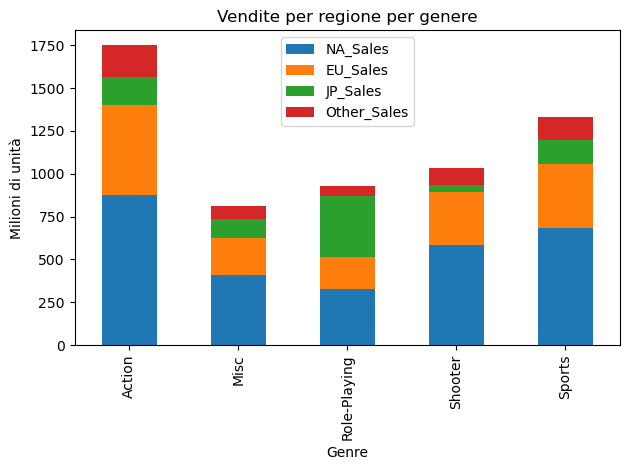


In [38]:
# Import dei pacchetti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


numero videogiochi pubblicati:  11493


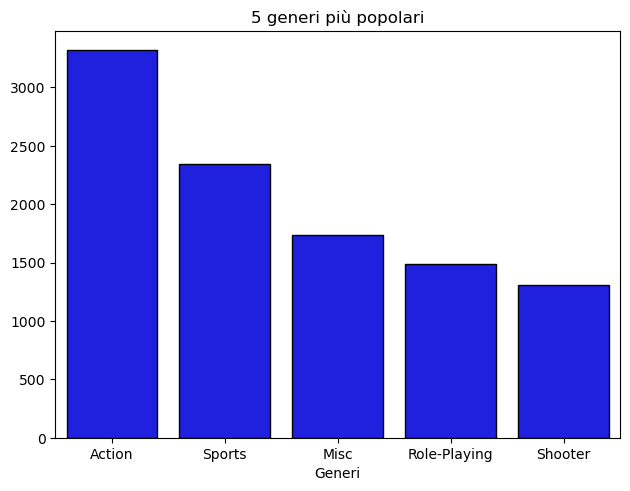

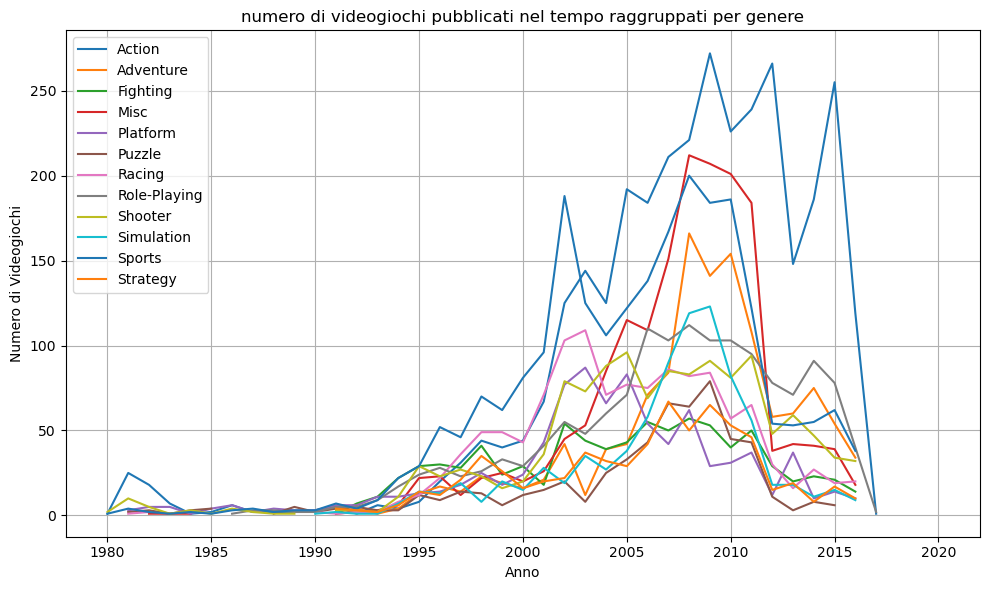

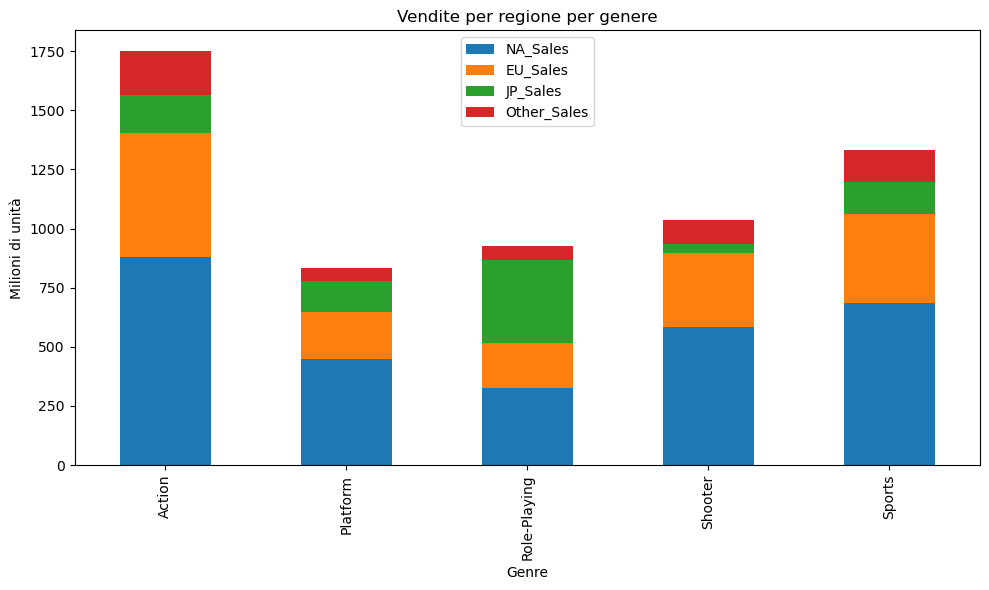

In [68]:
#quanti videogiochi sono stati pubblicati
print('numero videogiochi pubblicati: ', df['Name'].nunique())

#plot dei generi più popolari
top_5 = df['Genre'].value_counts().head(5)
generi = top_5.index
count = top_5.values

plot_df = pd.DataFrame({'Genre': generi, 'Count': count})

sns.barplot(data=plot_df, x=generi, y=count, color='blue', edgecolor='black')
plt.tight_layout()
plt.title('5 generi più popolari')
plt.xlabel('Generi')

plt.show()


#plot evoluzione del numero di giochi pubblicati nel tempo
grouped = df.groupby(['Year', 'Genre']).size().reset_index(name='Count')

pivot_df = grouped.pivot(index='Year', columns='Genre', values='Count')

pivot_df.plot(kind='line', figsize=(10,6))

plt.title('numero di videogiochi pubblicati nel tempo raggruppati per genere')
plt.xlabel('Anno')
plt.ylabel('Numero di Videogiochi')
plt.tight_layout()
plt.grid()
plt.legend()

plt.show()


#riproduzione plot vendite per regione per genere
top5_vendite = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(5)

generi = top5_vendite.index
df_top = df[df['Genre'].isin(generi)]

vendite_regio = df_top.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

vendite_regio.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Vendite per regione per genere')
plt.legend(loc='upper center')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Milioni di unità')
plt.tight_layout()

plt.show()